# Airbnb Listing & Reviews

In this case study, we will analyze a dataset of Airbnb listing & reviews. And will try to find out answer of following questions.

# Recommended Analysis

**1. Can you spot any major differences in the Airbnb market between cities?**

**2. Which attributes have the biggest influece on Price?**

**3. Are you able to identify any trends or seasonality in the review data?**

**4. Which city offers a better value for travel?**

In [1]:
#Importing all essential libraries to analyze data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading 'listing' dataset

df = pd.read_csv('/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv', encoding = 'latin')
df

/tmp/ipykernel_18/165499733.py:3: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv', encoding = 'latin')


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


# Performing some basic analysis on dataset

In [3]:
#To get mathmetical information

df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
#To call out only top 5 rows

df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
#To get 5 bottom rows

df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [6]:
#To get details of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [7]:
#To extract all column names 

df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [8]:
#If we want to make grouping by city/location then,

df.groupby('city')['instant_bookable'].count()

city
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Istanbul          24519
Mexico City       20065
New York          37012
Paris             64690
Rio de Janeiro    26615
Rome              27647
Sydney            33630
Name: instant_bookable, dtype: int64

# Let's jump on questions

# 1. Can you spot any major differences in the Airbnb market between cities?

In [9]:
sort_df = df.groupby('city')['instant_bookable'].count().sort_values(ascending = False)
sort_df

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: instant_bookable, dtype: int64

Text(0.5, 1.0, 'Instant Bookable Chart')

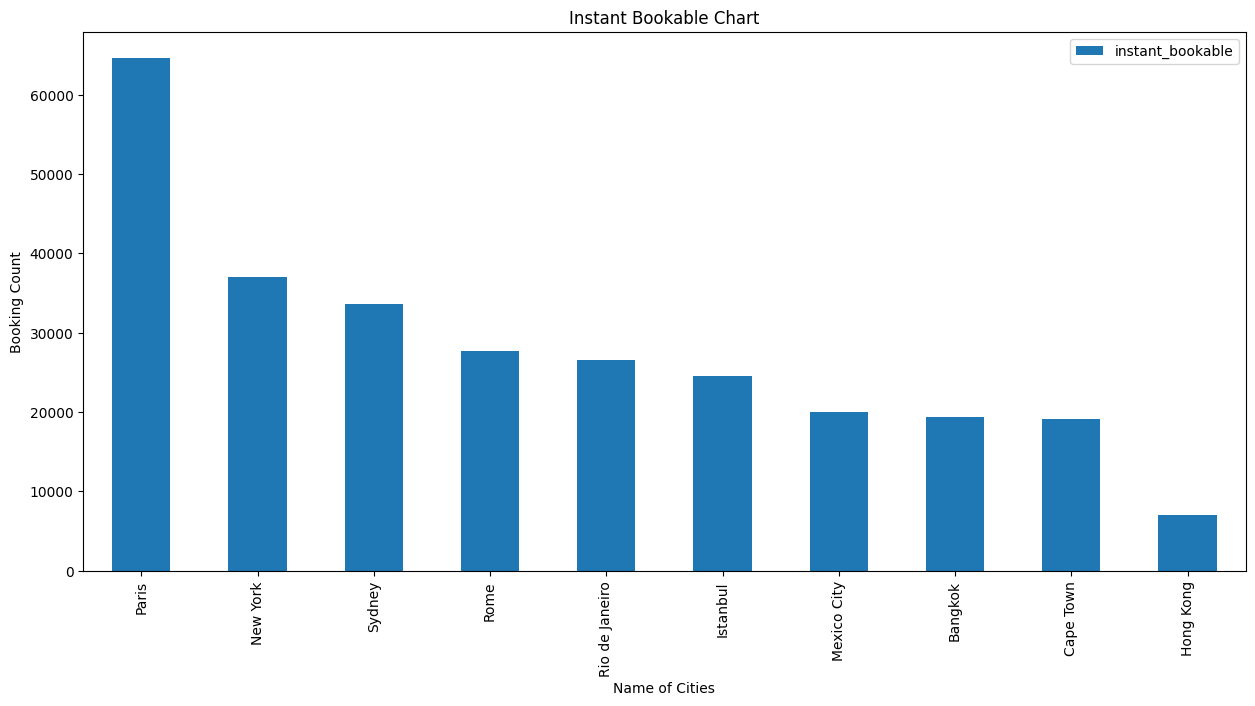

In [10]:
#From above it can be said that "Paris" is the city with maximum instant bookings
#Hence, same thing can be represented by visualization. Let's plot a graph to understand this betterly

sort_df.to_frame().plot(kind = 'bar', figsize = (15,7))
plt.xlabel("Name of Cities")
plt.ylabel("Booking Count")
plt.title("Instant Bookable Chart")

**Above graph is telling us that Paris is on top and Hong Kong is on last.**

# 2. Which attributes have the biggest influence on price?

In [11]:
#Bedrooms, review_scores_rating, review_scores_clealiness, price such type of factors/attributes may impact on price

bedrooms = df.groupby("city")["bedrooms"].count().sort_values(ascending = False)
bedrooms

city
Paris             51286
New York          33404
Sydney            31421
Rome              26773
Rio de Janeiro    24869
Istanbul          22485
Mexico City       19256
Cape Town         17707
Bangkok           17219
Hong Kong          5857
Name: bedrooms, dtype: int64

In [12]:
price = df.groupby("city")["price"].mean().sort_values(ascending = False)
price

city
Cape Town         2405.120350
Bangkok           2078.278033
Mexico City       1149.253028
Hong Kong          746.169889
Rio de Janeiro     742.589254
Istanbul           532.557445
Sydney             222.013440
New York           142.842240
Paris              113.096445
Rome               105.107643
Name: price, dtype: float64

In [13]:
review_scores_cleanliness = df.groupby("city")["review_scores_cleanliness"].mean().sort_values(ascending = False)
review_scores_cleanliness

city
Mexico City       9.564676
Cape Town         9.530781
Rome              9.496687
Bangkok           9.412901
Rio de Janeiro    9.392376
New York          9.268009
Sydney            9.206995
Paris             9.206446
Istanbul          9.054278
Hong Kong         8.992324
Name: review_scores_cleanliness, dtype: float64

In [14]:
review_scores_rating = df.groupby("city")["review_scores_rating"].mean().sort_values(ascending = False)
review_scores_rating

city
Mexico City       94.837959
Rio de Janeiro    94.571349
Cape Town         94.404838
New York          93.767188
Rome              93.516489
Sydney            93.234135
Paris             93.063931
Bangkok           93.001699
Istanbul          91.063496
Hong Kong         89.707517
Name: review_scores_rating, dtype: float64

**From the above we can say that bedrooms, review_scores_ratings and review_scores_cleanliness plays an important role for the influence of price. As, we can say paris has the most bedrooms with low price.**

# 3. Which city offers a better value for travel?

In [15]:
#We can get the answer of this question just by sorting the name of cities in descending manner.

price_value = df.groupby('city')['price'].mean().sort_values(ascending = True)
price_value

city
Rome               105.107643
Paris              113.096445
New York           142.842240
Sydney             222.013440
Istanbul           532.557445
Rio de Janeiro     742.589254
Hong Kong          746.169889
Mexico City       1149.253028
Bangkok           2078.278033
Cape Town         2405.120350
Name: price, dtype: float64

Text(0.5, 1.0, 'Price Chart')

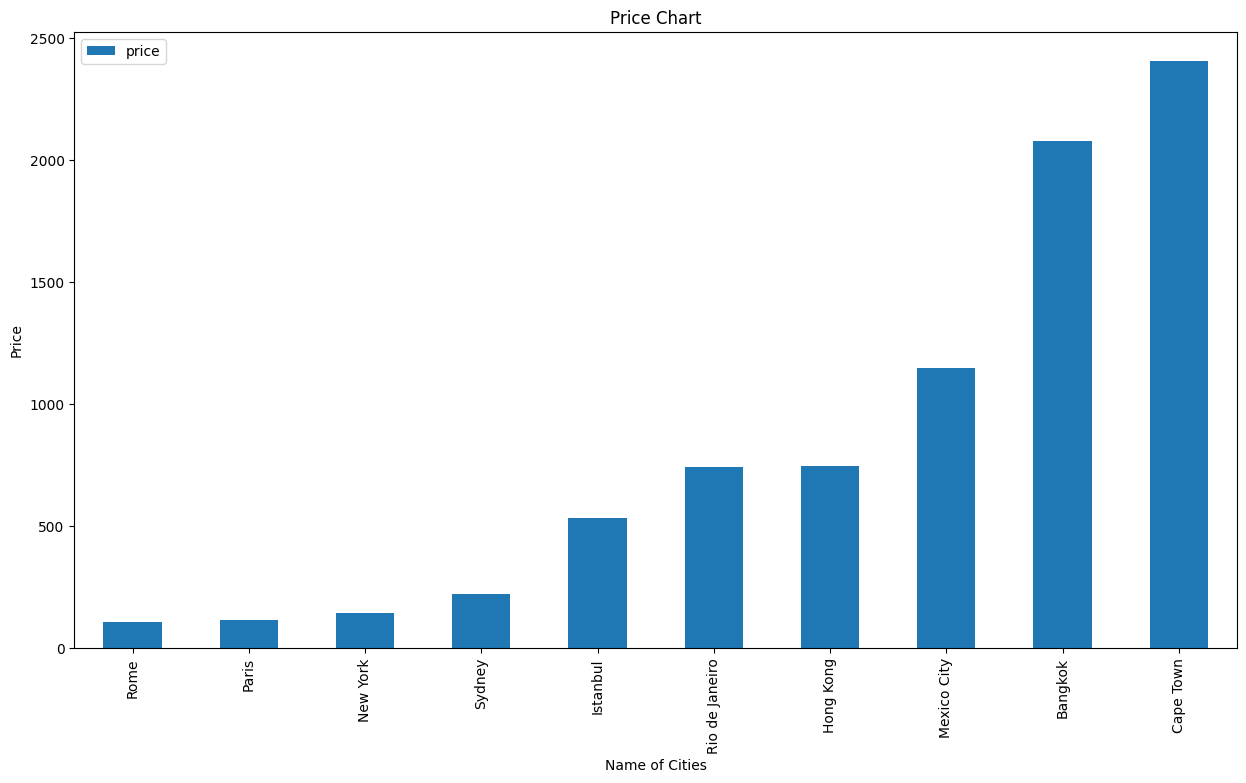

In [16]:
price_value.to_frame().plot(kind = 'bar',figsize = (15,8))
plt.xlabel('Name of Cities')
plt.ylabel('Price')
plt.title('Price Chart')

**As we can see from above chart, Rome is the city among all which is offering the better value for travel. Because, travel value for Rome is 105 only.**

# 4. Are you able to identify any trends or seasonality in the review data?

In [17]:
df['host_since'].value_counts().sort_values(ascending = False)

host_since
2019-09-02    710
2013-07-16    463
2018-02-24    463
2016-09-29    415
2015-12-16    368
             ... 
2009-07-02      1
2009-09-28      1
2009-10-13      1
2010-01-21      1
2009-10-10      1
Name: count, Length: 4240, dtype: int64

Text(0.5, 1.0, 'Bookable count as per cities')

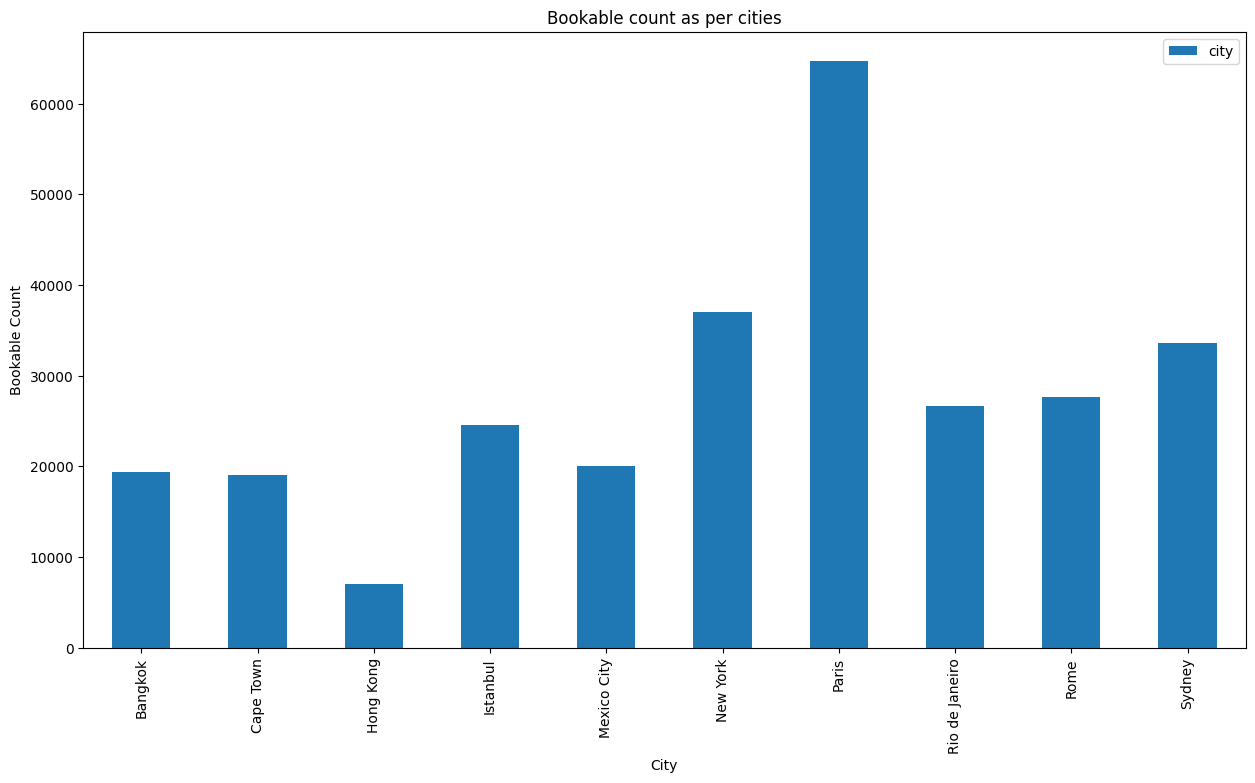

In [18]:
df.groupby("city").agg("city").count().to_frame().plot(kind = 'bar', figsize = (15,8))
plt.xlabel('City')
plt.ylabel('Bookable Count')
plt.title('Bookable count as per cities')

**This trend can be seen from above graph that Paris city was on top, followed by Newyork whereas, Hongkong was on last.**